# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.cm as cm

# Import .dat files

# 1. Data Preprocessing

## 1.2 Samples (indexed by experiment, client and collection time)

In [47]:
# path = '../argos-scripts/avoidance*'
path = '../data/avoidance*'

samples = {} # samples{ <exp_id> : {<rid>: { <traj_id> : { 'traj' : [], 'end' : <time_collected> }}}

for filename in glob.iglob(path):
    exp_id = filename[-10:-4]
    last_sample_keys = {}
    samples.update({exp_id : {}})
    for line in open(filename):
        data = line.split(',')
        if len(data) == 7:
            rid = int(data[0])
            tracked = int(data[1])
            t = int(data[2])
            x1 = float(data[3])
            x2 = float(data[4])
            if rid in samples[exp_id].keys():
                last_key = last_sample_keys[rid]
                if(last_key not in samples[exp_id][rid]):
                    samples[exp_id][rid][last_key] = {'traj': [], 'end' : 0, 'tracked' : 0}
                samples[exp_id][rid][last_key]['traj'].append((x1, x2))
                # samples[exp_id][rid][last_key]['end'] = t
                if len(samples[exp_id][rid][last_key]['traj']) == 100:
                    # del samples[exp_id][rid][last_key]['traj'][98]
                    samples[exp_id][rid][last_key]['end'] = t
                    samples[exp_id][rid][last_key]['tracked'] = tracked
                    last_sample_keys[rid]+=1
            else:
                samples[exp_id].update({rid: {}})
                samples[exp_id][rid].update({0: {'traj': [(x1, x2)], 'end': 0, 'tracked' : 0}})
                last_sample_keys.update({rid: 0})
        else:
            last_key = last_sample_keys[rid] 
            if(last_key in samples[exp_id][rid] and len(samples[exp_id][rid][last_key]) != 0):
                last_sample_keys[rid]+=1
    num_robots = len(samples[exp_id].keys())

In [48]:
# from collections import OrderedDict
# from operator import getitem

for rid in samples[exp_id].keys():
    sorted_list = sorted(samples[exp_id][rid].items(), key = lambda x: x[1]['end'])
    count = 0
    for i in range(len(sorted_list)):
        samples[exp_id][rid][count] = sorted_list[count][1]
        count+=1

# print(sorted_dict[10][1])
# res = OrderedDict(sorted(samples[exp_id][13].items(), key = lambda x: x[1]['end']))
# print(res[1])
# print(sorted_dict)

In [49]:
print(samples[exp_id][1][0]['end'])
print(samples[exp_id][1][1]['end'])
print(samples[exp_id][1][2]['end'])
print(samples[exp_id][1][3]['end'])
print(samples[exp_id][1][4]['end'])
print(samples[exp_id][1][5]['end'])
print(samples[exp_id][1][6]['end'])
print(samples[exp_id][1][7]['end'])
print(samples[exp_id][1][8]['end'])
print(samples[exp_id][1][9]['end'])
print(samples[exp_id][1][10]['end'])
print(samples[exp_id][1][11]['end'])
print(samples[exp_id][1][12]['end'])
print(samples[exp_id][1][13]['end'])
print(samples[exp_id][1][14]['end'])
print(samples[exp_id][1][15]['end'])


100
200
401
501
605
702
705
802
906
969
1003
1006
1103
1109
1167
1209


# 2. Plots

## 2.1 Trajectories in x,y

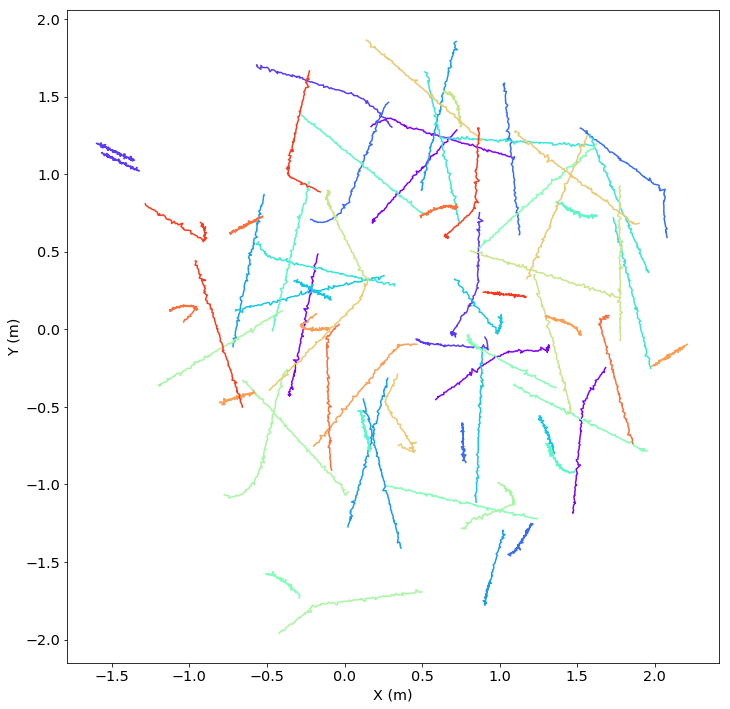

In [33]:
colors = cm.rainbow(np.linspace(0, 1, 15))

plt.figure(figsize = (12,12))
for exp_data in samples.values():
    count_robots = 0
    for rid in range(1, len(exp_data.keys())):
        count_traj = 0
        for traj in exp_data[rid].values():
            x, y = zip(*traj['traj'])
            # print(rid, x, y)
            # print(len(traj['traj']))
            # plt.text(x[0], y[0], str(traj['end']-99))
            # plt.text(x[-1], y[-1], str(traj['end']))
            # plt.text(x[49], y[49], str(rid) + " - " + str(traj['tracked']), fontsize='14', color=colors[count_robots])
            plt.plot(x, y, color=colors[count_robots])
            count_traj += 1
            if(count_traj == 5): break
        count_robots += 1
        if(count_robots == 15): break
    break
    
ax = plt.gca()
# circle = plt.Circle((0, 0), 2.5, color='b', fill=False)
# ax.add_artist(circle)
plt.axis('square')
ax.tick_params(labelsize='x-large')
plt.xlabel('X (m)', fontsize='x-large')
plt.ylabel('Y (m)', fontsize='x-large')
plt.show()

## 2.2 Histograms

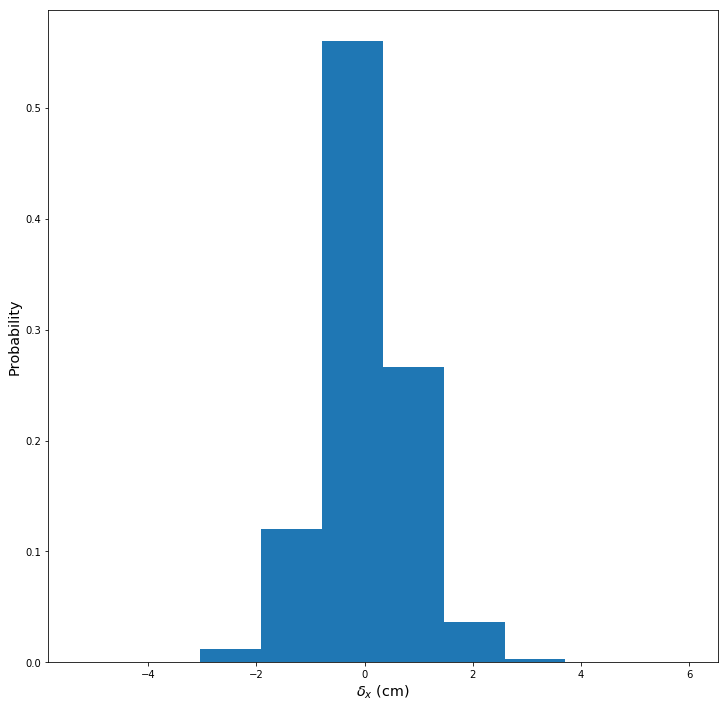

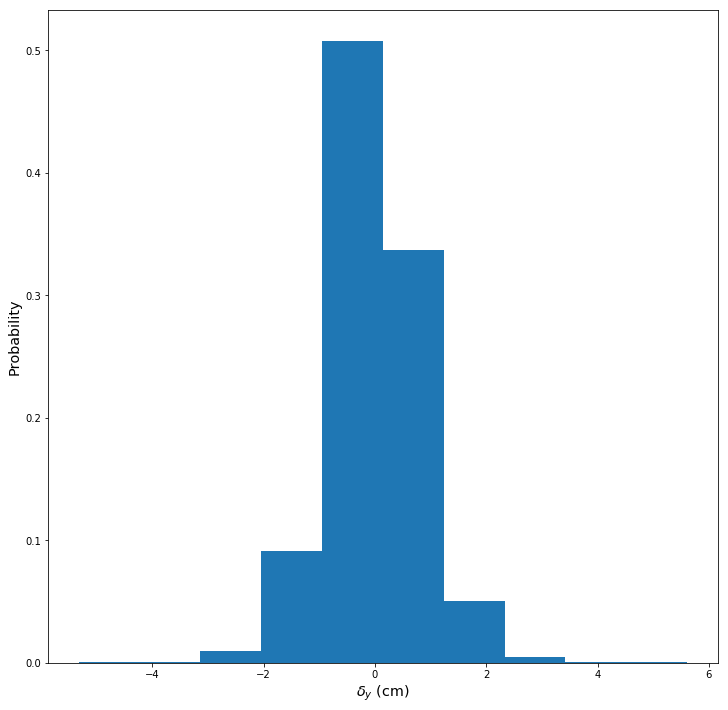

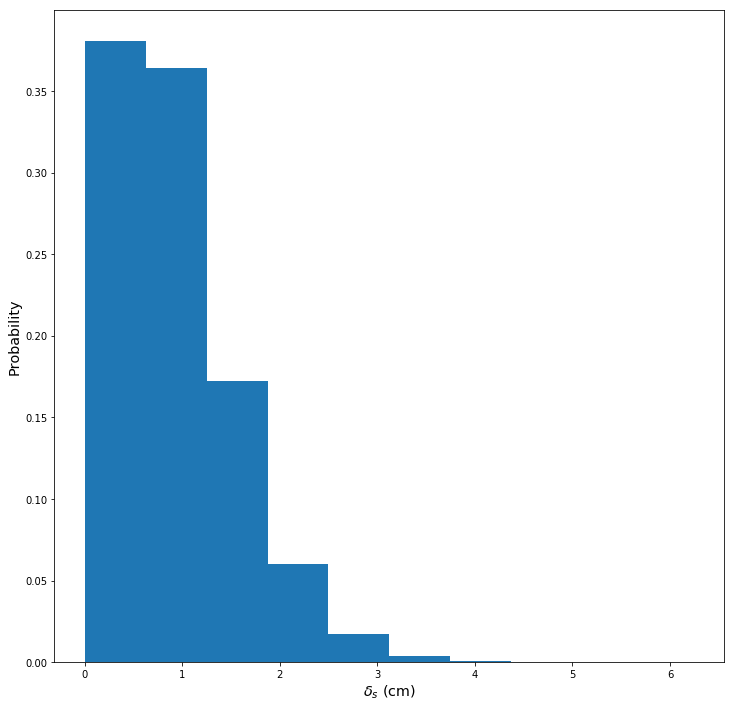

In [25]:
x = []
y = []
mag = []

count = 0
for exp_data in samples.values():
    count_robots = 0
    for rid in range(1, len(exp_data.keys())):
        count_traj = 0
        for traj in exp_data[rid].values():
            x_tmp, y_tmp = zip(*traj['traj'])
            x_offsets = np.diff(x_tmp)* 100
            y_offsets = np.diff(y_tmp) * 100
            mag_offsets = np.sqrt(np.square(x_offsets)+ np.square(y_offsets))
            x.extend(x_offsets.tolist())
            y.extend(y_offsets.tolist())
            mag.extend(mag_offsets.tolist())
            # print(x)
            # break
            # count += 1
            # if(count > 100):
                # break
        # break
    # break
weights = np.ones_like(x)/len(x)

plt.figure(figsize = (12,12))
plt.hist(x, weights=weights)
plt.xlabel('$\delta_x$ (cm)', fontsize='x-large')
plt.ylabel('Probability', fontsize='x-large')
plt.show()
plt.figure(figsize = (12,12))

plt.hist(y, weights=weights)
plt.xlabel('$\delta_y$ (cm)', fontsize='x-large')
plt.ylabel('Probability', fontsize='x-large')
plt.show()

plt.figure(figsize = (12,12))
plt.hist(mag, weights=weights)
plt.xlabel('$\delta_s$ (cm)', fontsize='x-large')
plt.ylabel('Probability', fontsize='x-large')
plt.show()